Kernel Classification Example

In [15]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(1000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))

Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])
Y = np.hstack((Y1, Y2))
print(X.shape)

(1000, 2)


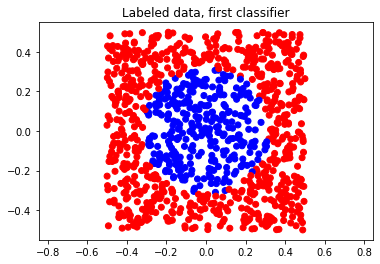

In [16]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y1[:,0]])
plt.axis('equal')
plt.title('Labeled data, first classifier')
plt.show()

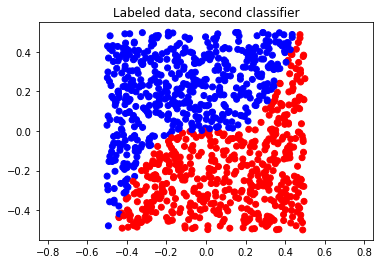

In [17]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y2[:,0]])
plt.title('Labeled data, second classifier')
plt.axis('equal')
plt.show()

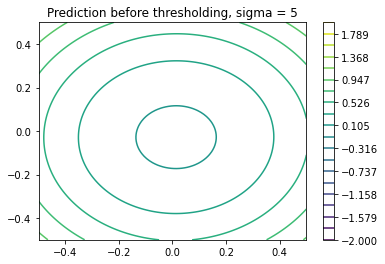

/var/folders/xq/klwnbkbd5c9f7sjrtmfvfztr0000gn/T/ipykernel_81257/4228518492.py:37: UserWarning: No contour levels were found within the data range.
  plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))


Text(0.5, 1.0, 'Prediction after thresholding, sigma = 5')

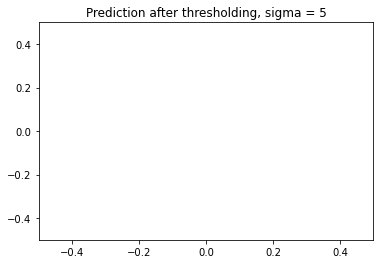

In [20]:
# Train Classifier 1
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1


# Predict labels on a grid of points 

X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
# plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))


In [22]:
print(x1_grid.shape, x2_grid.shape, Y_hat_grid.shape)

(100,) (100,) (100, 100)


In [ ]:
# Train Classifier 2
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y2


# Predict labels on a grid of points 
X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))